In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
class AdalineGD(object):
    #eta = learning rate
    #n_iter = passes over training dataset
    #w_ = 1D array of weights, of length len(x) + 1 where x is an input
    #errors_ = list of errors per epoch over time. 
    def __init__(self, eta, n_iter):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y): #X is a matrix of numsamples x numfeatures, y is an array of numsamples targets, (labels)
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors) #use whole training dataset, not one increment at a time
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [16]:
#partial of the cost with respect to weight j
#update to weight j is: -lr * (sum(yi - phi(zi)))* xij

In [17]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
lables = []
for yi in y:
    if yi == 'Iris-versicolor':
        lables.append(1)
    else:
        lables.append(-1)
lables = np.array(lables)
X = df.iloc[0:100, [0, 2]].values

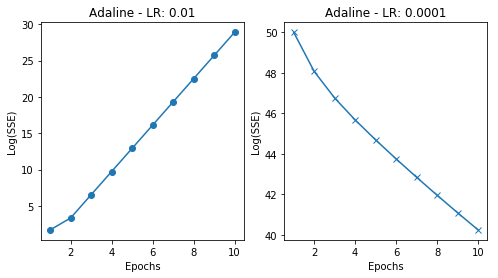

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, lables)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Log(SSE)')
ax[0].set_title('Adaline - LR: 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, lables)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='x')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Log(SSE)')
ax[1].set_title('Adaline - LR: 0.0001')
plt.show()

In [28]:
def standardize_data(X):
    X_std = np.copy(X)
    X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
    X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    return X_std

In [29]:
x_std = standardize_data(X)

In [30]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(x_std, lables)

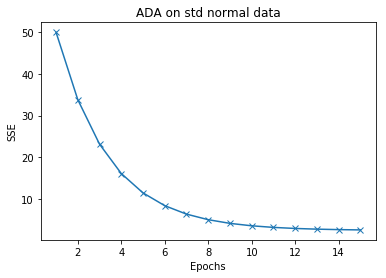

In [32]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='x')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.title('ADA on std normal data')
plt.show()